In [2]:
!pip install streamlit langchain google-cloud-vision google.generativeai easyocr pyttsx3 pillow matplotlib

  Using cached streamlit-1.40.1-py2.py3-none-any.whl.metadata (8.5 kB)
     ---------------------------------------- 0.0/44.3 kB ? eta -:--:--
     ---------------------------------------- 44.3/44.3 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
    --------------------------------------- 0.2/8.6 MB 5.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/8.6 MB 8.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/8.6 MB 8.8 MB/s eta 0:00:01
   ------ --------------------------------- 1.4/8.6 MB 9.0 MB/s eta 0:00:01
   -------- ------------------------------- 1.8/8.6 MB 8.3 MB/s eta 0:00:01
   ---------- ----------------------------- 2.3/8.6 MB 8.5 MB/s eta 0:00:01
   ------------ --------------------------- 2.8/8.6 MB 8.9 MB/s eta 0:00:01
   -------------- ------------------------- 3.2/8.6 MB 8.9 MB/s eta 0:00:01
   --------------- ------------------------ 3.5/8.6 MB 8.5 MB/s eta 0:00:01
   ------------------ --

In [4]:
import os
from google.cloud import vision

# Set up Google Cloud API credentials
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/Lenovo/GenAI_Assignments/Project_BeMyEyes/api/credentials.json"

def describe_scene(image_path):
    client = vision.ImageAnnotatorClient()

    # Read the image
    with open(image_path, "rb") as img_file:
        content = img_file.read()
    image = vision.Image(content=content)

    # Get labels (descriptions) from the Vision API
    response = client.label_detection(image=image)
    labels = [label.description for label in response.label_annotations]
    
    # Return descriptions as a comma-separated string
    return ", ".join(labels)

# Test with an example image
scene_description = describe_scene("C:/Users/Lenovo/Downloads/test.jpg")
print("Scene Description:", scene_description)


Scene Description: Building, Pot rack, Cabinetry, Kitchen utensil, Kitchen stove, Wood, Home appliance, Tableware, Kitchen, Kitchen appliance


In [8]:
!pip install gtts

In [20]:
# Install the required library:
# pip install google-cloud-aiplatform

import vertexai
from vertexai.generative_models import GenerativeModel, Image
import pytesseract  # For OCR
from gtts import gTTS  # For Text-to-Speech
from IPython.display import Audio  # To play audio in Jupyter Notebook
from PIL import Image as PILImage  # For loading and preprocessing images

# Initialize Vertex AI
PROJECT_ID = "ai-assistive-app"
REGION = "us-central1"  # e.g., "us-central1"
vertexai.init(project=PROJECT_ID, location=REGION)

# Load the Gemini multimodal model
model = GenerativeModel("gemini-1.5-flash")

# Function to generate a scene description
def generate_scene_description(image_path):
    """
    Generate a refined scene description from an uploaded image.
    """
    # Load the image
    image = Image.load_from_file(image_path)
    
    # Generate the scene description
    response = model.generate_content(["Describe this image in detail:", image])
    return response.text

# Function to extract text from the image
def extract_text_from_image(image_path):
    """
    Extract text from an image using OCR.
    """
    image = PILImage.open(image_path)
    text = pytesseract.image_to_string(image)
    return text

# Function to convert text to speech
def text_to_speech(text, output_file="output_audio.mp3"):
    """
    Convert text to speech using Google Text-to-Speech.
    """
    tts = gTTS(text)
    tts.save(output_file)
    return Audio(output_file, autoplay=True)

# Main workflow
def process_image(image_path):
    """
    Process the uploaded image to generate a scene description
    and extract text for Text-to-Speech conversion.
    """
    print("Generating scene description...")
    scene_description = generate_scene_description(image_path)
    print("Scene Description:", scene_description)
    
    print("\nExtracting text from image...")
    extracted_text = extract_text_from_image(image_path)
    print("Extracted Text:", extracted_text)
    
    if extracted_text.strip():
        print("\nConverting text to speech...")
        audio = text_to_speech(extracted_text)
        display(audio)
    else:
        print("No text found in the image for Text-to-Speech conversion.")

# Example: Process an uploaded image
image_path = "C:/Users/Lenovo/Downloads/test.jpg"
process_image(image_path)

Generating scene description...
Scene Description: The image shows a vintage kitchen with a large, cast iron stove at the center. The stove is covered in black paint with a large round burner and a smaller one on the right side. The burner is covered in black soot, suggesting it has been used recently.

The stovetop is cluttered with a variety of kitchen utensils, including:

* A large, round, golden-colored pan.
* A smaller, silver pan.
* A silver kettle with a lid.
* A silver waffle iron with a wooden handle.
* Several silver cooking utensils.

The stove is surrounded by white tiles with a blue and white diamond pattern. The walls are also lined with a wooden rack, upon which hang numerous vintage kitchen tools, including:

* A wooden mallet.
* A wooden ladle.
* Wooden spoons.
* A wooden rolling pin.
* A wooden cutting board.
* Several metal utensils.

To the right of the stove is a small, white table covered with a white tablecloth and a lace overlay. On the table are a few white bo

In [21]:
import easyocr

def extract_text(image_path):
    reader = easyocr.Reader(['en'])
    results = reader.readtext(image_path)
    extracted_text = " ".join([res[1] for res in results])
    return extracted_text

# Test with an example image
# text_from_image = extract_text("example_image.jpg")
# print("Extracted Text:", text_from_image)


In [22]:
import pyttsx3

def text_to_speech(text):
    if not text:
        print("No text to convert to speech.")
        return
    engine = pyttsx3.init()
    engine.say(text)
    engine.runAndWait()

# Test with the extracted text
# text_to_speech("This is a test speech output.")


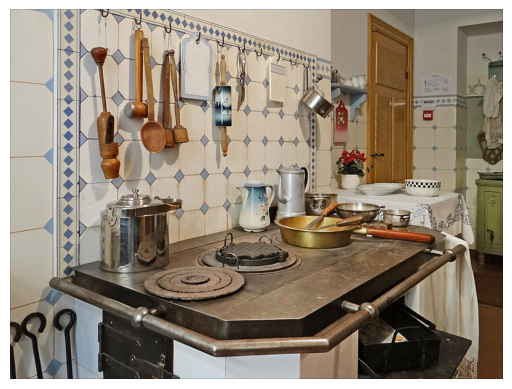

Generating scene description...
Scene Description: The image shows a vintage kitchen with a large, cast iron stove in the foreground. The stove has two round openings for cooking, and a metal handle to open the oven door below. There is a waffle iron, a large frying pan and a variety of kitchen utensils on the stovetop. 

In the background are white and blue diamond-patterned tiles covering the walls.  A wooden door is partially open on the right side of the image. There are various kitchen tools hanging on the wall above the stove. There is a shelf above the stove that holds a pitcher and other items. A table with a white tablecloth is in the background, set with a bowl and plates. There is a potted plant with red flowers on the table. A cabinet with a green door is visible in the far right corner of the image. The kitchen is quaint and old-fashioned.

Extracting text from image...
Extracted Text: 
No text found in the image for Text-to-Speech conversion.


In [23]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt

def display_image(image_path):
    """Display an image."""
    img = PILImage.open(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Example usage in Jupyter
image_path = "C:/Users/Lenovo/Downloads/test.jpg"
display_image(image_path)
process_image(image_path)

In [28]:
import vertexai
from vertexai.generative_models import GenerativeModel, Image
import pytesseract  # For OCR
from gtts import gTTS  # For Text-to-Speech
from IPython.display import Audio  # To play audio in Jupyter Notebook
from PIL import Image as PILImage  # For loading and preprocessing images

# Initialize Vertex AI
PROJECT_ID = "ai-assistive-app"
REGION = "us-central1"  # e.g., "us-central1"
vertexai.init(project=PROJECT_ID, location=REGION)

# Load the Gemini multimodal model
model = GenerativeModel("gemini-1.5-flash")

# Function to generate a scene description
def generate_scene_description(image_path):
    """
    Generate a refined scene description from an uploaded image.
    """
    # Load the image
    image = Image.load_from_file(image_path)
    
    # Generate the scene description
    response = model.generate_content(["Describe this image in detail:", image])
    return response.text

# Function to extract text from the image
def extract_text_from_image(image_path):
    """
    Extract text from an image using OCR.
    """
    image = PILImage.open(image_path)
    text = pytesseract.image_to_string(image)
    return text

# Function to convert text to speech
def text_to_speech(text, output_file="output_audio.mp3"):
    """
    Convert text to speech using Google Text-to-Speech.
    """
    tts = gTTS(text)
    tts.save(output_file)
    return Audio(output_file, autoplay=True)

# Main workflow
def process_image(image_path):
    """
    Process the uploaded image to generate a scene description
    and extract text for Text-to-Speech conversion.
    """
    print("Generating scene description...")
    scene_description = generate_scene_description(image_path)
    print("Scene Description:", scene_description)
    
    print("\nExtracting text from image...")
    extracted_text = extract_text_from_image(image_path)
    print("Extracted Text:", extracted_text)
    
    # Combine the scene description and extracted text
    combined_text = f"{scene_description}\n\nExtracted Text: {extracted_text}" if extracted_text.strip() else scene_description
    
    print("\nCombined Text for Speech:", combined_text)
    
    print("\nConverting combined text to speech...")
    audio = text_to_speech(combined_text)
    display(audio)

# Example: Process an uploaded image
image_path = "C:/Users/Lenovo/Downloads/test3.png"
process_image(image_path)


Generating scene description...
Scene Description: The image depicts a heartwarming story about a blind boy named Aryan who lives in a small village surrounded by misty mountains. Aryan, despite his blindness, has a bright spirit and loves to experience the world through his other senses, like the warmth of the sun on his face, the rustle of leaves, and the sound of birds singing. He has a close friend named Maya, who is a budding artist and helps him understand the world through her vivid descriptions. 

One day, Aryan and Maya stumble upon an injured dove in the forest. Aryan, with trembling hands, gently scoops up the bird.  He expresses determination to help the dove, and together with Maya, they nurse it back to health. The dove, instead of flying away, stays close to them, becoming their loyal companion.

The story takes a turn as the village faces a severe drought, leaving the people desperate. However, during a dark night, Aryan hears the cooing sound of the dove, which provide

In [30]:
!pip install langchain-google-vertexai

   ---------------------------------------- 0.0/89.9 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/89.9 kB ? eta -:--:--
   --------- ------------------------------ 20.5/89.9 kB 217.9 kB/s eta 0:00:01
   ------------------ --------------------- 41.0/89.9 kB 326.8 kB/s eta 0:00:01
   ---------------------------------------- 89.9/89.9 kB 568.8 kB/s eta 0:00:00


In [33]:
from langchain_google_vertexai import VertexAI

In [38]:
from langchain_google_vertexai import VertexAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# Initialize Vertex AI LLM
google_llm = VertexAI(
    model="text-bison",  # Use "text-bison" for text generation
    temperature=0.7,
    max_output_tokens=512,
    top_p=0.8,
    top_k=40,
)

# Define a prompt template
scene_prompt = PromptTemplate(
    input_variables=["image_description"],
    template="Describe this image in a detailed and engaging manner: {image_description}"
)

# Create an LLMChain
scene_chain = LLMChain(llm=google_llm, prompt=scene_prompt)

# Function to refine scene description
def refine_scene_description_with_google(gemini_output):
    refined_description = scene_chain.run(image_description=gemini_output)
    return refined_description

# Example: Updating the process_image function
def process_image_with_google_langchain(image_path):
    """
    Process the image and use Google's LLM in LangChain to refine scene descriptions.
    """
    # Step 1: Generate scene description using Gemini
    gemini_description = generate_scene_description(image_path)
    print("Initial Scene Description from Gemini:", gemini_description)
    
    # Step 2: Refine the description using Google's LLM
    refined_description = refine_scene_description_with_google(gemini_description)
    print("Refined Scene Description:", refined_description)
    
    # Step 3: Extract text and combine with refined description
    extracted_text = extract_text_from_image(image_path)
    combined_text = f"{refined_description}\n\nExtracted Text: {extracted_text}" if extracted_text.strip() else refined_description
    
    # Step 4: Text-to-Speech
    print("Combined Text for Speech:", combined_text)
    audio = text_to_speech(combined_text)
    display(audio)

# Example: Process an uploaded image
image_path = "C:/Users/Lenovo/Downloads/test.jpg"
process_image(image_path)

Generating scene description...
Scene Description: The image shows a vintage kitchen with a large, black cast iron stove. The stove has two burners with round, black grates and a metal handle. It is covered in soot and grime, indicating frequent use. There are various cooking utensils on the stove, including a large, golden-colored frying pan, a smaller metal pan, a silver-colored kettle, and a waffle iron. 

The stove is positioned in front of a tiled wall with a diamond pattern. The tiles are white with blue accents. Several wooden cooking utensils are hanging on hooks above the stove, along with a couple of wooden cutting boards.  A blue and white ceramic pitcher with flowers is also visible on the countertop.  

To the right of the stove is a partially obscured table covered with a white lace tablecloth.  A couple of bowls sit on the table, along with a small bouquet of red flowers in a white pot.  There is also a closed wooden door in the background. The overall feel of the image 

In [41]:
from gtts import gTTS  # For Text-to-Speech
from IPython.display import Audio  # To play audio in Jupyter Notebook

# Function to convert text to speech
def text_to_speech(scene_description, output_file="output_audio.mp3"):
    """
    Convert scene description to speech with an additional message.
    """
    # Add the appended message
    additional_message = "I can only extract this information from the image. Do you want me to assist you with any other query."
    final_text = scene_description + " " + additional_message
    
    # Generate audio
    tts = gTTS(final_text)
    tts.save(output_file)
    return Audio(output_file, autoplay=True)

# Example usage
def process_image(image_path):
    """
    Process the uploaded image to generate a scene description
    and convert it to speech.
    """
    print("Generating scene description...")
    scene_description = generate_scene_description(image_path)
    print("Scene Description:", scene_description)
    
    print("\nConverting scene description to speech...")
    if scene_description.strip():
        # Pass the scene description to the text-to-speech function
        audio = text_to_speech(scene_description)
        display(audio)
    else:
        print("No description could be generated for the image.")
        fallback_message = "I could not generate a description for this image. Do you want me to assist you with any other query?"
        audio = text_to_speech(fallback_message)
        display(audio)

# Example: Process an uploaded image
image_path = "C:/Users/Lenovo/Downloads/test.jpg"
process_image(image_path)


Generating scene description...
Scene Description: The image shows a vintage kitchen with a large, cast-iron stove at the forefront. The stove has two circular hotplates, one with a waffle iron on top, and a metal handle on the side.  

The stove is covered in a layer of rust and grime, suggesting age and frequent use. On top of the stove are various cooking utensils, including a frying pan, a large pot, and a few smaller saucepans. Some of the utensils are made of brass and have a patina of age. 

The wall behind the stove is tiled with a white and blue pattern, with various cooking utensils hanging from hooks. The utensils include a wooden mallet, a ladle, a rolling pin, and a few other tools, suggesting the stove and its surroundings are part of a working kitchen. 

The image suggests a kitchen that was well-loved and well-used. The patina on the metal items and the worn-out wood suggests that the kitchen has been in use for many years. The overall impression is one of warmth, comfo

In [42]:
from typing import Literal

class SafetySetting:
    level: Literal["safe", "moderate", "strict"]


In [ ]:
from typing import Type

# Example SafetySetting class definition
class SafetySetting:
    pass

# Example Pydantic model using SafetySetting
from pydantic import BaseModel

class MyModel(BaseModel):
    safety: SafetySetting

In [ ]:
Steps to resolve the issue:
1. Ensure that 'SafetySetting' is Defined
Check the place in your code where SafetySetting is used (likely as a type annotation). You need to ensure that the SafetySetting class or type is defined or imported properly.

For example, if you are using SafetySetting as a field type in a Pydantic model, it should be declared like this:

python
Copy code
from typing import Type

# Example SafetySetting class definition
class SafetySetting:
    pass

# Example Pydantic model using SafetySetting
from pydantic import BaseModel

class MyModel(BaseModel):
    safety: SafetySetting
2. Forward Declaration with __annotations__ (if needed)
If SafetySetting is being used before it is declared (i.e., in the same file but after it's referenced), you can use forward declarations or import it properly. In Pydantic, forward references should be declared like this:

python
Copy code
from __future__ import annotations
from pydantic import BaseModel

class MyModel(BaseModel):
    safety: 'SafetySetting'  # Forward reference
This way, SafetySetting can be resolved correctly by Pydantic, even if it's defined later in the code.

3. Check the Import of SafetySetting
If SafetySetting is defined in another module, ensure that it is imported correctly:

python
Copy code
from mymodule import SafetySetting
Ensure there are no circular import issues.

4. Check for Typo or Incorrect Annotations
If SafetySetting is not defined in your code or if there’s a typo in the annotation, you will face this issue. Verify that the name is spelled correctly and that the module containing SafetySetting is properly imported.

5. Update Pydantic Version
This error might also occur due to a Pydantic version mismatch, as newer versions may introduce stricter handling of annotations. Ensure you're using a compatible version (e.g., pydantic==2.7.4) as required by langchain and other dependencies.

To update Pydantic to the correct version:

bash
Copy code
pip install pydantic==2.7.4
6. Example Check
If you're still encountering issues, you could try simplifying your model temporarily to isolate the error, for example:

python
Copy code
from pydantic import BaseModel

class SafetySetting:
    # Define fields for SafetySetting
    pass

class MyModel(BaseModel):
    safety: SafetySetting
By doing this, you can identify whether the issue lies with the Pydantic configuration or a specific part of your model.



### with open ai

In [ ]:
import streamlit as st
import openai
from pydantic import BaseModel
import os

# Set up your OpenAI API key (ensure you replace with your key)
openai.api_key = "your-openai-api-key"

# Example of a Pydantic model for structured input data
class SafetySetting(BaseModel):
    safety_level: str
    location: str

# Streamlit App
def main():
    st.title("Guardian Angel Assistance App")
    st.markdown("Welcome to the Guardian Angel Assistance App. Please interact with the options below.")

    # Safety Settings form
    with st.form("Safety Settings Form"):
        safety_level = st.selectbox("Select Safety Level", ["Low", "Medium", "High"])
        location = st.text_input("Enter your location")
        submitted = st.form_submit_button("Submit")

        if submitted:
            safety_settings = SafetySetting(safety_level=safety_level, location=location)
            st.write("Safety Settings Saved:", safety_settings)

    # Chat functionality with OpenAI
    st.header("Chat with Guardian Angel")

    user_input = st.text_input("Ask your Guardian Angel:")
    if user_input:
        response = openai.Completion.create(
            model="text-davinci-003",
            prompt=user_input,
            max_tokens=150
        )
        st.write("Guardian Angel Response:", response.choices[0].text.strip())

    # Additional helpful tips
    st.sidebar.title("Helpful Tips")
    st.sidebar.write("This is a virtual assistant to help you with safety-related inquiries and other tasks.")
    
    # Optionally, log the user's inputs for debugging purposes
    st.sidebar.write("Logs:")
    st.sidebar.text_area("Input Log", value=f"Safety Level: {safety_level}\nLocation: {location}\nUser Query: {user_input}", height=200)

if __name__ == "__main__":
    main()
